# SHML Grammar Scoring Engine

This notebook demonstrates the functionality of the Speech and Human Language Grammar Scoring Engine. It processes audio files, analyzes grammar, and generates scores and visualizations.

## Overview

The SHML Grammar Scoring Engine performs the following tasks:

1. **Audio Processing**: Transcribes speech from audio files using Whisper or Google ASR
2. **Grammar Analysis**: Analyzes the transcription for grammar errors, sentence structure, and vocabulary usage
3. **Scoring**: Calculates overall scores and subscores based on the analysis
4. **Visualization**: Generates visualizations of the analysis and scores
5. **Reporting**: Creates comprehensive reports with feedback

## Setup and Requirements

First, let's make sure all the required libraries are installed. If you're running this notebook for the first time, uncomment and run the cell below.

In [ ]:
# !pip install numpy pandas scikit-learn matplotlib seaborn torch torchaudio transformers datasets
# !pip install librosa soundfile nltk language-tool-python SpeechRecognition openai-whisper

## Imports

Let's import all the necessary libraries and modules.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, Any, List, Optional, Union
import json

# Import SHML modules
from grammar_scorer.grammar_scorer import GrammarScorer
from grammar_scorer.audio_processor import AudioProcessor
from grammar_scorer.grammar_analyzer import GrammarAnalyzer
from grammar_scorer.scoring import GrammarScorer as Scorer

## Initialize the Grammar Scorer

First, we'll initialize the Grammar Scorer with the desired Whisper model size and device.

In [2]:
# Initialize the grammar scorer
# Choose a model size: 'tiny', 'base', 'small', 'medium', 'large'
model_size = "base"
# Choose a device: 'cpu' or 'cuda' for GPU acceleration (if available)
device = None  # None will automatically select the appropriate device

print(f"Initializing Grammar Scorer with {model_size} model...")
scorer = GrammarScorer(whisper_model_size=model_size, device=device)

# You can customize scoring weights if desired
# custom_weights = {
#     'grammar_errors': 0.4,
#     'sentence_structure': 0.3, 
#     'vocabulary_usage': 0.3
# }
# scorer.scorer.set_weights(custom_weights)

Initializing Grammar Scorer with base model...
Loading Whisper base model on cpu...


[nltk_data] Downloading package wordnet to /Users/vishwas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Set Up Paths

Define the directories for input audio samples and output results.

In [3]:
# Directories for input audio samples and output results
samples_dir = "./samples"
output_dir = "./results"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# List audio files in the samples directory
audio_files = []
for filename in os.listdir(samples_dir):
    if filename.endswith(('.mp3', '.wav', '.ogg', '.flac')):
        audio_files.append(os.path.join(samples_dir, filename))

print(f"Found {len(audio_files)} audio file(s) in {samples_dir}:")
for audio_file in audio_files:
    print(f"- {os.path.basename(audio_file)}")

Found 2 audio file(s) in ./samples:
- english_taking_2_people_2mins_set1.mp3
- english_taking_2_people_2mins_set1.wav


## Process a Single Audio File

Let's process a single audio file to demonstrate the functionality.

In [4]:
# Select an audio file to process
# If there are any audio files, we'll use the first one; otherwise, you'll need to add some to the samples directory
if audio_files:
    audio_file = audio_files[0]
    print(f"Processing: {os.path.basename(audio_file)}")
    
    # Choose the ASR engine: 'whisper' or 'google'
    engine = "whisper"
    
    try:
        # Score the audio file
        result = scorer.score_audio(
            audio_path=audio_file,
            engine=engine,
            save_results=True,
            output_dir=output_dir
        )
        
        # Display the transcription
        print("\nTranscription:")
        print("-" * 50)
        print(result['transcription'][:200] + "..." if len(result['transcription']) > 200 else result['transcription'])
        print("-" * 50)
        
        # Display the scores
        print("\nScores:")
        print(f"Overall Score: {result['scoring']['scores']['overall_score']}/100")
        print("\nSubscores:")
        for category, score in result['scoring']['scores']['subscores'].items():
            print(f"  - {category.replace('_', ' ').title()}: {score}/100")
        
        # Display feedback
        print("\nFeedback Highlights:")
        for feedback in result['scoring']['feedback']:
            print(f"  - {feedback['category']}: {feedback['message']}")
        
        # Generate and save a report with visualizations
        report = scorer.generate_report(
            audio_path=audio_file,
            output_dir=output_dir,
            include_visualizations=True
        )
        
        print(f"\nDetailed report and visualizations saved to: {output_dir}")
    
    except Exception as e:
        print(f"Error processing {audio_file}: {str(e)}")
else:
    print("No audio files found in the samples directory. Please add some audio files and run this cell again.")

Processing: english_taking_2_people_2mins_set1.mp3
Transcribing audio file: ./samples/english_taking_2_people_2mins_set1.mp3


/Users/vishwas/Desktop/SHML/venv/lib/python3.12/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Analyzing grammar in transcription
Scoring grammar
Results saved to: ./results/english_taking_2_people_2mins_set1_grammar_score.json

Transcription:
--------------------------------------------------
 sound like native speakers to be considered fluent. I would say ladies first but it is up to you. Yes, I cannot hear you at the moment. Please, yeah, teacher feel the go ahead. Okay, sorry, I just, I...
--------------------------------------------------

Scores:
Overall Score: 79/100

Subscores:
  - Error Density: 89/100
  - Sentence Complexity: 100/100
  - Vocabulary Diversity: 74/100
  - Pos Distribution: 40/100
  - Error Variety: 65/100

Feedback Highlights:
  - Grammar Errors: Found 11 grammar errors in the text.
  - Word Usage: The distribution of parts of speech could be improved.
  - Overall Assessment: Satisfactory grammar with some notable issues.


/Users/vishwas/Desktop/SHML/grammar_scorer/grammar_scorer.py:273: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/Users/vishwas/Desktop/SHML/grammar_scorer/grammar_scorer.py:341: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



Detailed report and visualizations saved to: ./results


## Display Visualizations

If we've successfully processed an audio file and generated visualizations, let's display them.


Subscores Visualization:


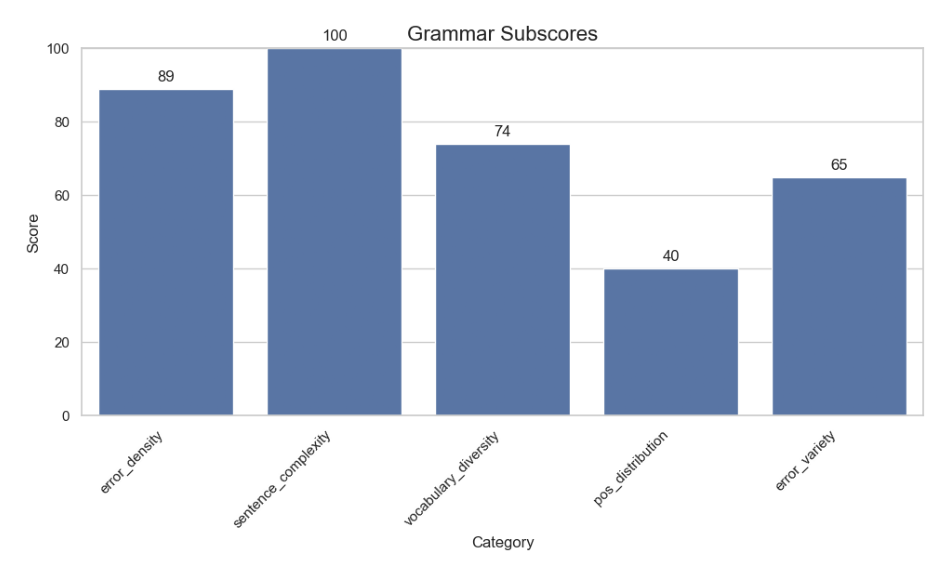


Error Types Visualization:


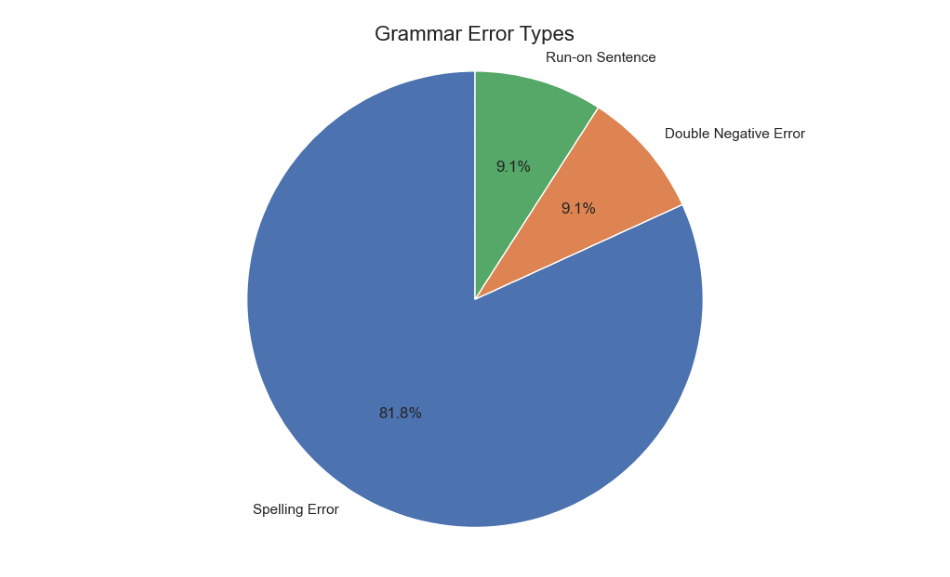


Sentence Types Visualization:


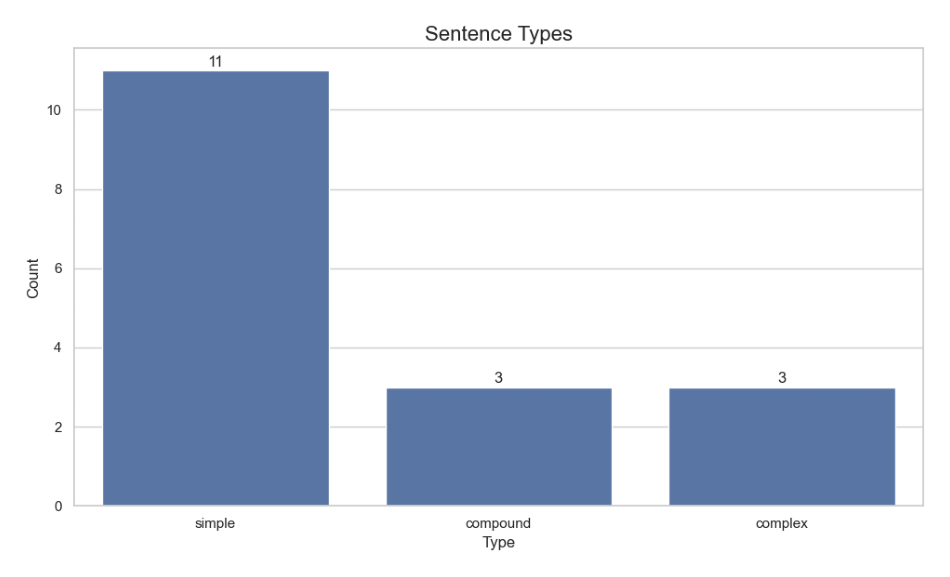


Pos Distribution Visualization:


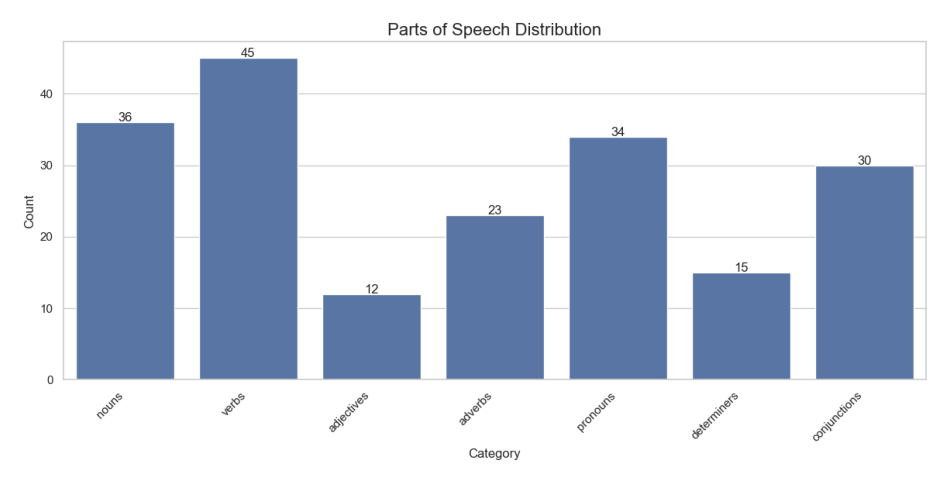

In [5]:
# Display the generated visualizations if they exist
if 'report' in locals() and 'visualizations' in report:
    visualizations = report['visualizations']
    
    # Display each visualization
    for viz_type, viz_path in visualizations.items():
        print(f"\n{viz_type.replace('_', ' ').title()} Visualization:")
        img = plt.imread(viz_path)
        plt.figure(figsize=(12, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.show()
else:
    print("No visualizations available. Make sure an audio file was processed successfully.")

## Analyze Custom Text

You can also analyze custom text directly without processing audio.

In [ ]:
# Sample text to analyze
sample_text = """This is a sample text that we can use to demonstrate the grammar analysis functionality. 
It has some interesting features. It might contain a few errors, such as missing punctuation or misspelled words
We can see how the grammar analyzer identifies these issues and provides feedback."""

# Analyze the text
analysis = scorer.analyze_text(sample_text)

# Score the analysis
scoring_result = scorer.score_grammar(analysis)

# Display the scores
print("Scores for Sample Text:")
print(f"Overall Score: {scoring_result['scores']['overall_score']}/100")
print("\nSubscores:")
for category, score in scoring_result['scores']['subscores'].items():
    print(f"  - {category.replace('_', ' ').title()}: {score}/100")

# Display feedback
print("\nFeedback:")
for feedback in scoring_result['feedback']:
    print(f"  - {feedback['category']}: {feedback['message']}")

# Display grammar errors
print("\nGrammar Errors:")
for error in analysis['grammar_check']['errors']:
    print(f"  - Type: {error['type']}, Message: {error['message']}")
    print(f"    Context: ...{error['context']}...")

Scores for Sample Text:
Overall Score: 77/100

Subscores:
  - Error Density: 63/100
  - Sentence Complexity: 99/100
  - Vocabulary Diversity: 100/100
  - Pos Distribution: 48/100
  - Error Variety: 80/100

Feedback:
  - Grammar Errors: Found 8 grammar errors in the text.
  - Word Usage: The distribution of parts of speech could be improved.
  - Overall Assessment: Satisfactory grammar with some notable issues.

Grammar Errors:


KeyError: 'rule'

## Batch Processing

Process multiple audio files in batch mode.

In [ ]:
# Process all audio files in batch mode
if len(audio_files) > 1:
    print(f"Batch processing {len(audio_files)} audio files...")
    
    batch_results = scorer.batch_process(
        audio_paths=audio_files,
        engine="whisper",
        output_dir=output_dir
    )
    
    # Display a summary of the results
    print("\nBatch Processing Results:")
    for audio_path, result in batch_results.items():
        if 'error' in result:
            print(f"- {os.path.basename(audio_path)}: Error - {result['error']}")
        else:
            print(f"- {os.path.basename(audio_path)}: Score {result['scoring']['scores']['overall_score']}/100")
    
    # Compare audio files (if there are at least 2 successfully processed)
    successful_audios = [audio_path for audio_path, result in batch_results.items() if 'error' not in result]
    
    if len(successful_audios) >= 2:
        print("\nComparing audio files...")
        comparison = scorer.compare_audios(
            audio_paths=successful_audios,
            output_dir=output_dir
        )
        
        # If there's a comparison visualization, display it
        if 'visualization_path' in comparison:
            print(f"\nComparison Visualization:")
            img = plt.imread(comparison['visualization_path'])
            plt.figure(figsize=(12, 8))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
else:
    print("Not enough audio files for batch processing. Please add more audio files to the samples directory.")

## Custom Audio Processing

You can also upload your own audio file and process it directly.

In [ ]:
# This cell is for processing your own audio file
# Replace 'path_to_your_audio_file.mp3' with the actual path to your audio file
custom_audio_path = "samples/english_taking_2_people_2mins_set1.mp3"

# Check if the file exists
if os.path.exists(custom_audio_path):
    print(f"Processing custom audio file: {os.path.basename(custom_audio_path)}")
    
    try:
        # Score the audio file
        result = scorer.score_audio(
            audio_path=custom_audio_path,
            engine="whisper",
            save_results=True,
            output_dir=output_dir
        )
        
        # Generate and save a report with visualizations
        report = scorer.generate_report(
            audio_path=custom_audio_path,
            output_dir=output_dir,
            include_visualizations=True
        )
        
        # Display the scores
        print("\nScores:")
        print(f"Overall Score: {result['scoring']['scores']['overall_score']}/100")
        print("\nSubscores:")
        for category, score in result['scoring']['scores']['subscores'].items():
            print(f"  - {category.replace('_', ' ').title()}: {score}/100")
        
        print(f"\nDetailed report and visualizations saved to: {output_dir}")
        
    except Exception as e:
        print(f"Error processing {custom_audio_path}: {str(e)}")
else:
    print(f"Custom audio file '{custom_audio_path}' not found. Please provide a valid path.")

## Conclusion

This notebook demonstrates the functionality of the SHML Grammar Scoring Engine. You can:

1. Process audio files to transcribe speech and analyze grammar
2. Generate scores and visualizations based on the analysis
3. Compare multiple audio files
4. Analyze custom text directly

The grammar scoring engine can be useful for:
- Language learning and assessment
- Speech practice and improvement
- Educational applications
- Content quality analysis

Feel free to modify this notebook to suit your specific needs and datasets.